## Introduction

The `pyplot` interface is rich with a multitude of plotting functions. Going through each one in detail could be a course in, and of, itself, not to mention that it wouldn't be the best, or most interesting, use of our time. Instead, over the next few lessons, we'll walk through a handful of some of the more common plotting functions and leave the rest for you to explore in the well written, and thorough, matplotlib documentation.

In this lesson we'll explore the `plot` function to get a feel for just how flexible and powerful matplotlib's functions can be. By the end of this lesson, you should know how to use the `plot` function to display data in a line graph, and you should also have a decent feel for how to "think" about the interface that each plotting function provides.

With that, let's jump right in and take a look at some code.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## The `plot` Command

Matplotlib's `plot` command can be used to plot lines and/or markers on a graph, and in many cases this will be your "go to" plotting command, so it's only fitting that we take a slightly more extensive look at its interface. What I think you'll find, after working through the next few examples, is that the `plot` command is both extremely flexible, accommodating data in many different formats, and powerful, allowing you to specify the look and feel of each line in a graph through a simple format string, or set of keyword arguments. 

Before we can explore what the `plot` command has to offer though, we'll need to create a little bit of data to play around with. We'll use the NumPy library to create a few random samples for us. 

The code below uses the `numpy.random.randn` function to create three sets of random data drawn from the normal distribution.

In [2]:
l1, l2, l3 = np.random.randn(3, 20)

Once we have our sample data, we can try plotting it using the `plot` function. The `plot` function's interface is very flexible and allows us to pass in our data in several different ways. First, we can pass in a single list of values like the example below shows.

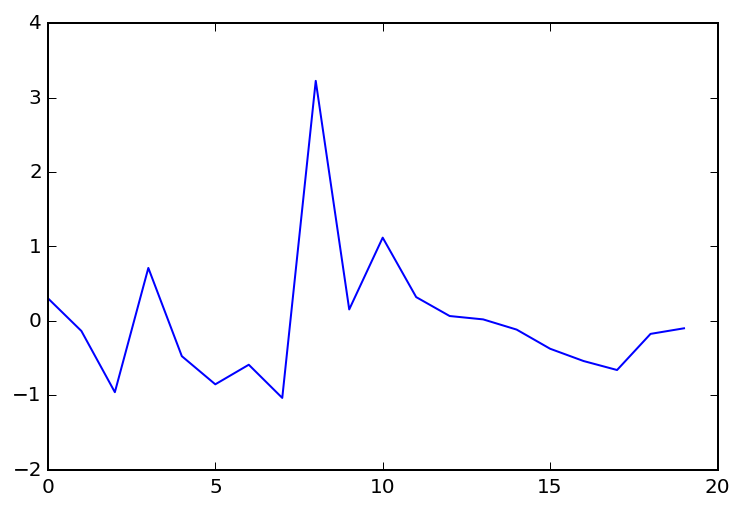

In [3]:
plt.plot(l1);

When we pass in a single list of values, the `plot` command assumes that we are passing in a list of `y-axis` values and it automatically creates a list of corresponding `x` values. Essentially, it will call the `range()` function on the length of the list we passed in to generate the list of `x` values. 

Often, this is all we really need to do to plot our data, but sometimes it's necessary to pass in a list of values for the `x-axis` as well. When you need to do that, you can just pass in two lists, where the first is the list of values for the `x-axis`, and the second is the list of `y-axis` values.

In the example below we're going to assume that our `x-axis` values start from a value other than `0`. So, we'll create a list of fake `x-axis` values by calling the `range()` function and creating a list of values equal in length to that of the `y` values list, but offset by `10`. Then we call the `plot` function again, this time passing in our list of `x-axis` values first, followed by the list of `y-axis` values.

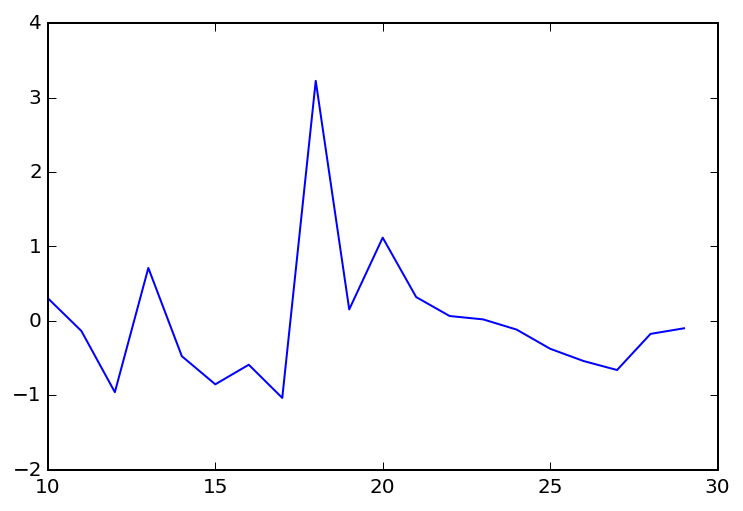

In [4]:
xs = range(10, 10 + len(l1))
plt.plot(xs, l1);

If the second or third parameter is a string, the `plot` function assumes that it's a format string describing how the line should be displayed. The format string can describe how the line looks, e.g., is it dashed or solid, the types of markers that are used to identify each data point, and the color of the line. 

Let's give it a try now by redrawing our graph, but this time, we'll draw a dashed, red line with squares as markers. To do so, simply pass in a string as the second parameter to the `plot` command containing the letter `'r'` and a couple of hyphens (`'--'`) to make the line red and dashed, and the letter `'s'` to mark each data point with a square. 

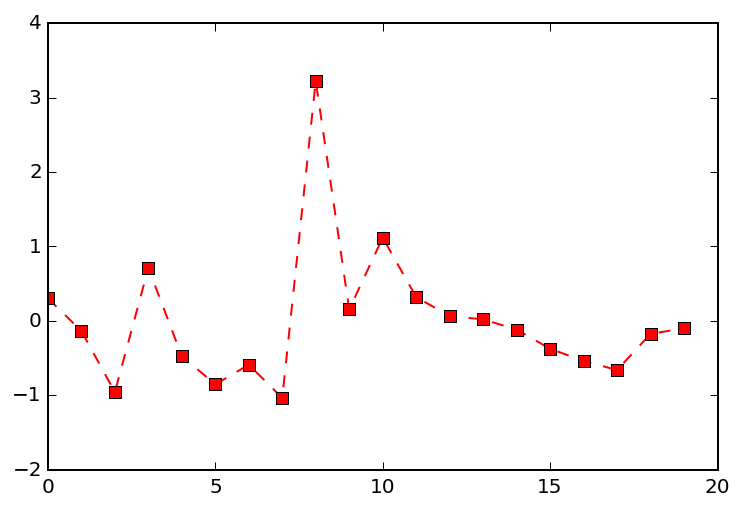

In [5]:
plt.plot(l1, 'r--s')

Pretty nice! There's a lot of power in that dense little string, and you can find the full list of format string options in the [`plot()` function's documentation][1] on the matplotlib website.

## Plotting Multiple Lines

So, we've learned how to display a single set of data points in several different ways using the `plot` function, but what if we have multiple lines that we want to plot? Well, the `plot` function makes that super easy, you simply, pass in a second set of values. There is a catch though, if you're thinking you'll just pass in all three of our lists and get three lines, like I'm doing in the following bit of code, you'd be mistaken.

[1]: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

ValueError: third arg must be a format string

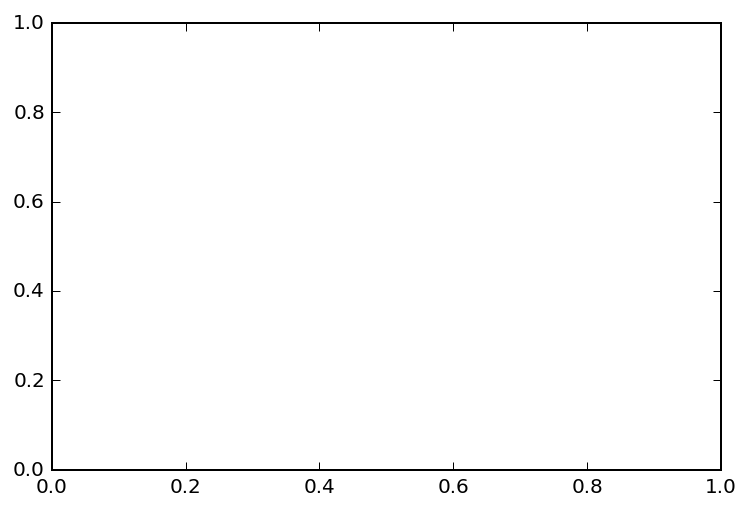

In [6]:
plt.plot(l1, l2, l3)

This makes sense though, doesn't it? The error we're getting is that the "third arg[ument] must be a format string". The problem is the flexibility of the `plot` function's interface. As we've already seen, we can pass in either a single list of `y` values and an optional format string or a list of `x` and a list of `y` values and, again, an optional format string. In the example above, the `plot` function thinks we're going with the second option and so it's expecting the third parameter to be the optional format string, but instead it sees another list, and it throws an error.

To fix this, we have a few options. We can pass in the optional format string for each of our lists, like the example below shows.

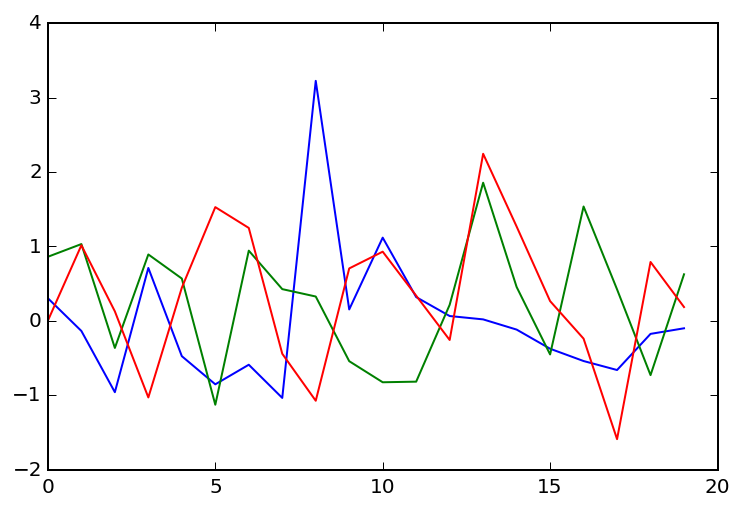

In [7]:
plt.plot(l1, '', l2, '', l3, '');

Notice in the example above, I am passing in an empty string for each line's format string. Doing so makes the string act as a simple delimiter for the `plot` function to parse out each line's data, but it doesn't affect the look of the line itself. In other words, we'll still get the default look for each line, and we'll leave the selection of color for each line up to the `plot` function. 

> Incidentally, if you're curious, matplotlib determines the color of each line by cycling through a list of colors that's defined in its configuration. You can execute the following line of code to see the list of colors matplotlib uses for each line.

In [8]:
plt.rcParams['axes.prop_cycle']

KeyError: 'axes.prop_cycle'

A second option for getting multiple lines to show up in your graph is to pass in two lists of values: one for the `x` values and another for the `y` values of each line, like so:

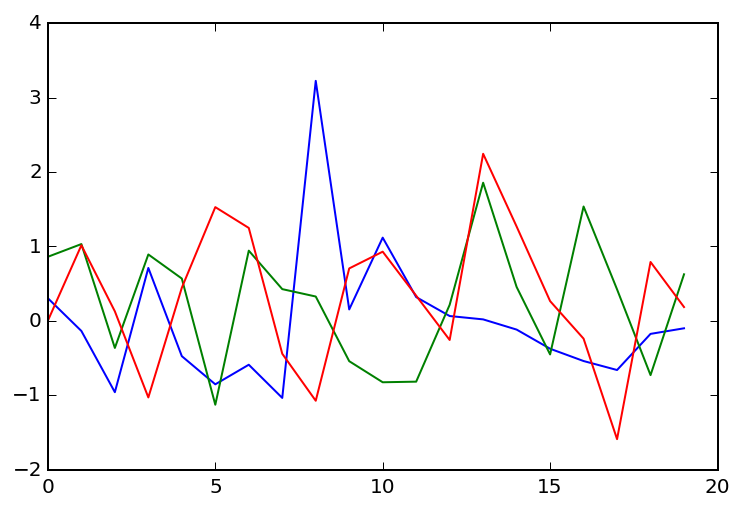

In [9]:
plt.plot(range(len(l1)), l1, range(len(l2)), l2, range(len(l3)), l3);

Since the `plot` function finds an even number of lists, it will assume that each pair of lists describes the `x` and `y` values for a single line in the data set. 

Finally, we can call the `plot` function with a combination of both of these methods to graph multiple of lines of data. The example below passes in lists of `x` and `y` values for the `l1` and `l3` lines, and the optional format string for the `l2` line.

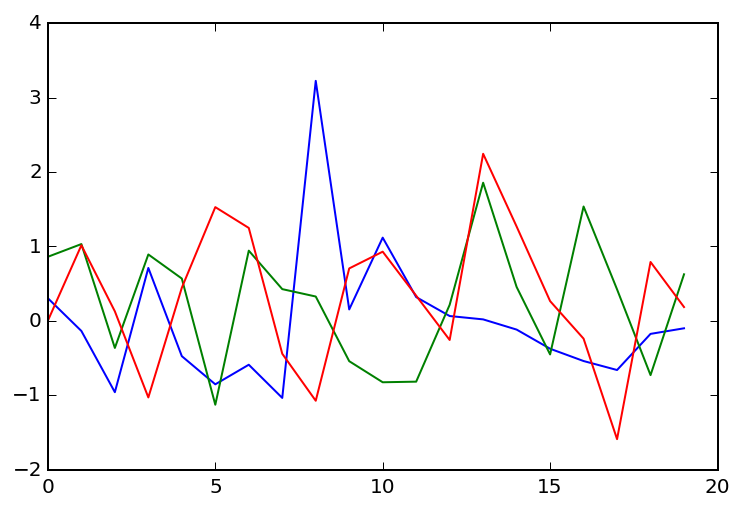

In [10]:
plt.plot(range(len(l1)), l1, l2, '', range(len(l3)), l3);

The examples above show us how to plot multiple lines by passing in each line's data as a separate list, but the `plot` function also allows us to pass in a matrix (i.e., a 2-dimensional array) where each column in the matrix represents a separate line in our graph. 

We can see this functionality in action, by using the `numpy.column_stack` function to stitch together our separate lists into a 2-D array. This function will "stack" a set of 1-D arrays as columns into a 2-D array, hence the name.

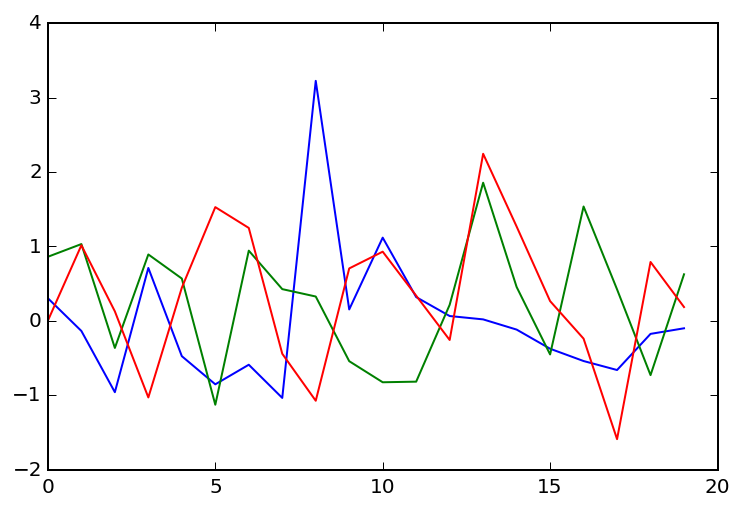

In [11]:
# Stack each of the 1-D arrays as columns into a 2-D array
data = np.column_stack((l1, l2, l3))
# Plot the data in the matrix, where each column represents a line in our plot
plt.plot(data);

We can now put everything we've leared above together into a single call to the `plot` function to plot each of our lists of data as a separate line with its own unique style, color, and markers. 

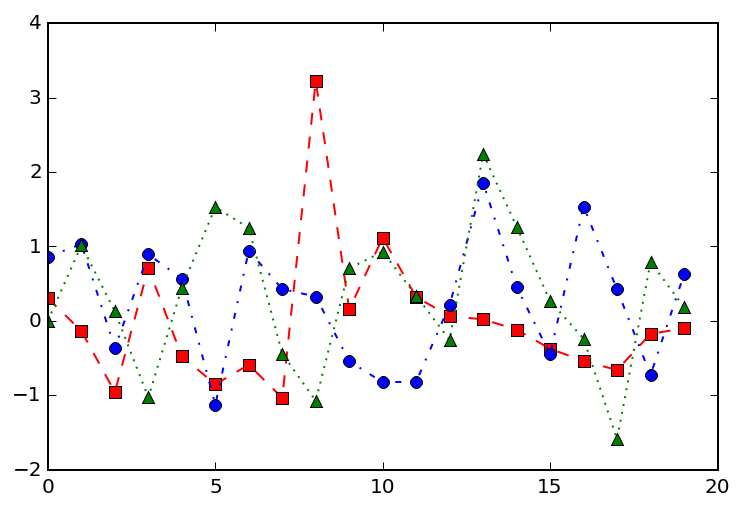

In [12]:
plt.plot(l1, 'r--s', l2, 'b-.o', l3, 'g:^');

Now, perhaps it's not the best looking graph you've ever seen, but it makes a pretty good example of the power the `plot` function gives us.

Though the example is very powerful---just look at how much we were able to do with a single line of code---it's arguably not the easiest code to read. Those format strings, while densely loaded with information, can be a bit cryptic to the untrained eye, and so it may be preferable to refactor the code into something that's a bit more maintainable when stepping away from the command line and into something with a little more longevity, like a script. 

Luckily, those format strings are just shorthand for a set of optional keyword arguments that you can specify in place of the format string. So, for example, we could recreate the graph above with the following three calls to the `plot` function, that are arguably easier to understand.

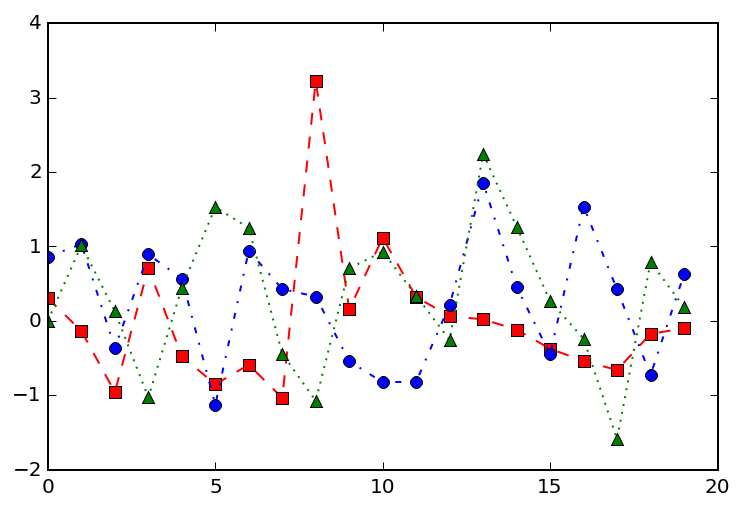

In [13]:
plt.plot(l1, color='red', linestyle='dashed', marker='s')
plt.plot(l2, color='blue', linestyle='dashdot', marker='o')
plt.plot(l3, color='green', linestyle='dotted', marker='^');

## Conclusion

And, with that, we've come to the end. 

In this lesson, we learned how to use the `plot` function to display a set of data in a simple line graph. More importantly though, we've learned a lot about how the creators of the matplotlib library envision its interface working. The simple idea is to try to handle data in every possible way it could be passed in. While this often makes creating simple visualizations work on the first try, it can make it harder to reason about each function when trying to do something more complex. My hope is that this lesson has helped you understand this trade off a bit, and has planted in you a small seed of understanding that will blossom into mastery as you work with each function more and more.